In [1]:
# 지도 시각화
## 미국 주별 강력 범죄율 단계 구분도 만들기
### 패키지 준비하기

install.packages('ggiraphExtra')
library(ggiraphExtra)

In [2]:
### 미국 주별 범죄 데이터 준비하기
str(USArrests)

Installing package into 'C:/Users/Playdata/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'gdtools', 'forcats', 'hms', 'readr', 'ps', 'zip', 'nortest', 'htmlwidgets', 'rvg', 'xml2', 'broom', 'haven', 'prediction', 'snakecase', 'stringdist', 'processx', 'tweenr', 'units', 'flextable', 'officer', 'moonBook', 'ggiraph', 'mycor', 'ppcor', 'sjlabelled', 'sjmisc', 'webshot', 'tidyr', 'ggforce', 'ztable'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
sjlabelled 1.0.13 1.0.14             FALSE
sjmisc      2.7.4  2.7.5             FALSE

package 'gdtools' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'nortest' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'rvg' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'prediction' successfully unpacked and MD5 sums checked
package 'snakecase' su

installing the source packages 'sjlabelled', 'sjmisc'



In [3]:
### 미국 주별 범죄 데이터 준비하기
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [4]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [5]:
library(tibble)

In [6]:
crime <- rownames_to_column(USArrests, var = 'state')
crime$state <- tolower(crime$state)

In [7]:
str(crime)

'data.frame':	50 obs. of  5 variables:
 $ state   : chr  "alabama" "alaska" "arizona" "arkansas" ...
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [9]:
head(crime)

state,Murder,Assault,UrbanPop,Rape
alabama,13.2,236,58,21.2
alaska,10.0,263,48,44.5
arizona,8.1,294,80,31.0
arkansas,8.8,190,50,19.5
california,9.0,276,91,40.6
colorado,7.9,204,78,38.7


In [12]:
### 미국 주 지도 데이터 준비하기
library(ggplot2)

In [14]:
?map_data

map_data {ggplot2},R Documentation
map,"name of map provided by the maps package. These include maps::county(), maps::france(), maps::italy(), maps::nz(), maps::state(), maps::usa(), maps::world(), maps::world2()."
region,name of subregions to include. Defaults to . which includes all subregion. See documentation for maps::map() for more details.
exact,should the region be treated as a regular expression (FALSE) or as a fixed string (TRUE).
...,all other arguments passed on to maps::map()


In [18]:
install.packages('maps')

Installing package into 'C:/Users/Playdata/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Playdata\AppData\Local\Temp\RtmpAVIAzu\downloaded_packages


In [19]:
if (require('maps')){
    states_map <- map_data('state')
    str(states_map)
}

Loading required package: maps


'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [21]:
install.packages('mapproj')

Installing package into 'C:/Users/Playdata/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Playdata\AppData\Local\Temp\RtmpAVIAzu\downloaded_packages


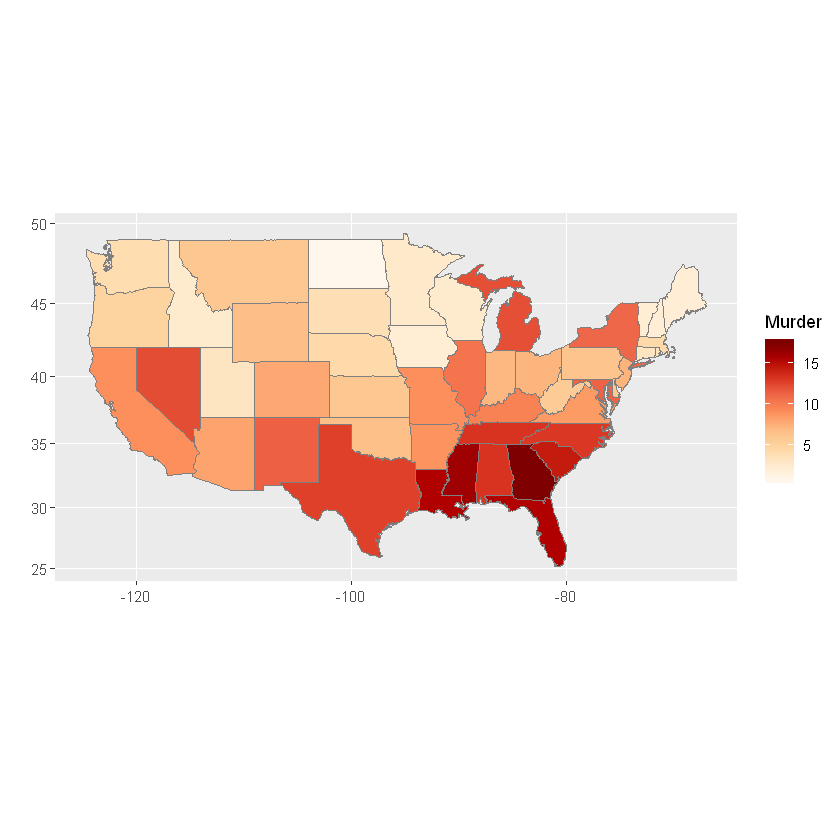

In [22]:
library(mapproj)
ggChoropleth(data = crime,
            aes(fill = Murder,
               map_id = state),
            map = states_map)

In [28]:
ggChoropleth(data = crime,
            aes(fill = Murder,
               map_id = state),
            map = states_map,
            interactive = T)

ERROR while rich displaying an object: Error in file(file, "rb"): 'description' 인자가 잘못되었습니다

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.htmlwidget(obj)
9. lapply(obj$dependencies, function(dep) {
 .     html <- c()
 .     if (length(dep$script) > 0) {
 .         f <- file.path(dep$src$file, dep$script)
 .         html <- c(html, sprintf("<script src=\"%s\"></script>", 
 .             dataURI(mime = "application/

HTML widgets cannot be represented in plain text (need html)